## 1. Import Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics

## 2. Import Dataset

In [21]:
df = pd.read_csv("dataset.csv")

## 3. Dataset Cleaning and Numerical Analysis

In [22]:
print(df.isnull().sum())
print(df[df.isnull().any(axis=1)])

df = df.dropna()
df = df.drop("A_id", axis = 1)

df = df.astype({'Acidity' : 'float64'})

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64
      A_id  Size  Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
4000   NaN   NaN     NaN        NaN          NaN        NaN       NaN   

                                Acidity Quality  
4000  Created_by_Nidula_Elgiriyewithana     NaN  


In [23]:
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


### Outliers Detection

In [24]:
num_features = ['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']

def count_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3-q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return ((data < lower_bound).sum() + (data > upper_bound).sum())

for i in num_features:
    total_outliers = count_outliers(df[i])
    print(f'Number of Outliers in {i} column : {total_outliers}')


Number of Outliers in Size column : 22
Number of Outliers in Weight column : 54
Number of Outliers in Sweetness column : 32
Number of Outliers in Crunchiness column : 47
Number of Outliers in Juiciness column : 32
Number of Outliers in Ripeness column : 24
Number of Outliers in Acidity column : 20


### Finding out data imbalance in categorical data/ dependent variable

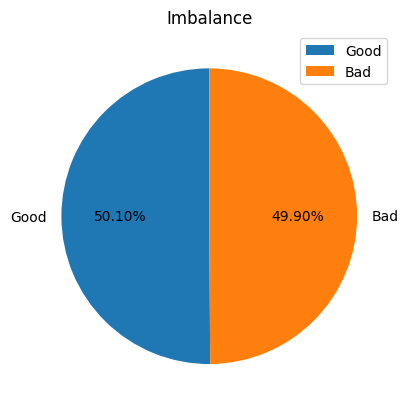

In [25]:

good = (df['Quality'][df['Quality'] == 'good']).count()
bad = (df['Quality'][df['Quality'] == 'bad']).count()
total = len(df)
good_pct = (good/total)*100
bad_pct = (bad/total)*100

plt.pie([good_pct, bad_pct], labels=['Good','Bad'], autopct='%.2f%%', startangle=90)
plt.title('Imbalance')
plt.legend()

## 4. Dataset Splitting

In [26]:
x = df.drop('Quality', axis=1)
y = df['Quality']

### Heatmap to show correlation

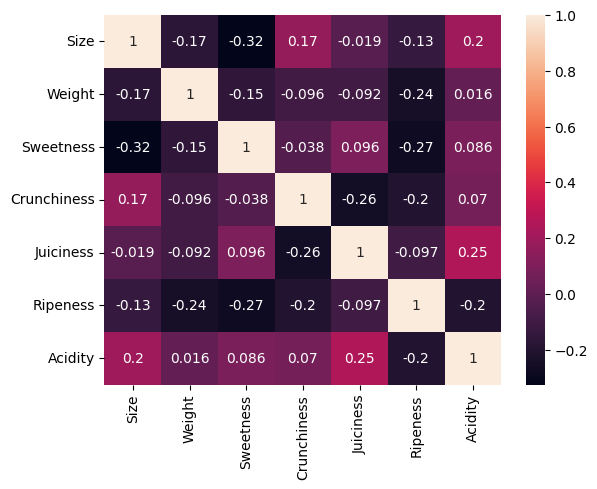

In [27]:
corr_mat = x.corr()
sns.heatmap(corr_mat, annot=True)
plt.show()

### Label Encoding Dependent Variable

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [29]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

### Scaling the dataset
It is mentioned in kaggle that the dataset has been scaled, however, upon further experimentation, it is found that with further scaling, the accuracy for SVC is better and the accuracy for other models did not change.

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Logistic Regression
Logistic Regression produced an accuracy of 75%, which is indicates that logistic regression is a decent model for this dataset

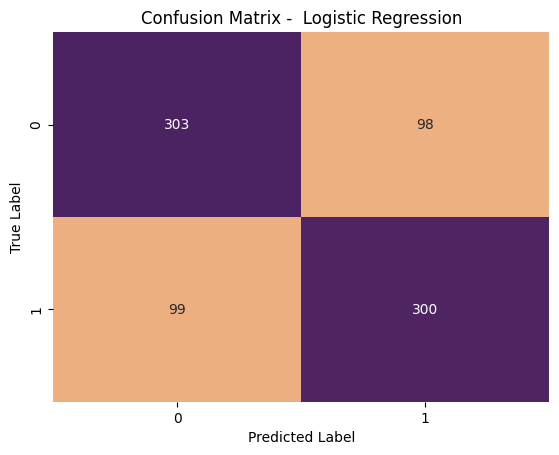

Accuracy score of Logistic Regression: 0.75375


In [31]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression()

model = reg.fit(x_train, y_train)
pred = model.predict(x_test)

sns.heatmap(metrics.confusion_matrix(y_test, pred), annot=True, fmt='d', cbar=False, cmap=sns.color_palette("flare", as_cmap=True))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix -  Logistic Regression')
plt.show()

print(f"Accuracy score of Logistic Regression: {metrics.accuracy_score(y_test, pred)}")

### Decision Tree Classifier
Decision Tree produced an accuracy of 82.375%, which is indicates that decision tree is a good model for this dataset

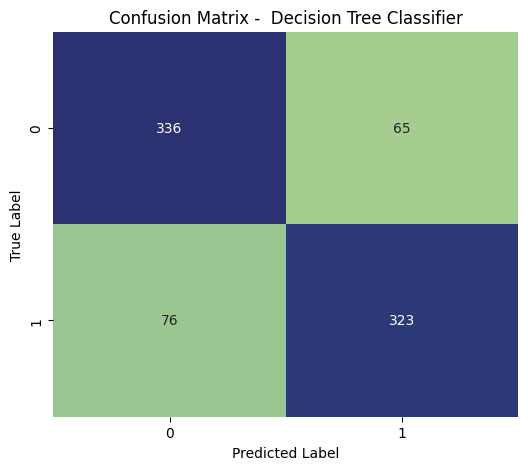

Accuracy score of Decision Tree Classifier: 0.82375


In [32]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
model = classifier.fit(x_train, y_train)

tree_pred = model.predict(x_test)

plt.figure(figsize=(6,5))
sns.heatmap(metrics.confusion_matrix(y_test, tree_pred), annot=True, fmt='d', cbar=False, cmap=sns.color_palette("crest", as_cmap=True))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix -  Decision Tree Classifier')
plt.show()

print(f"Accuracy score of Decision Tree Classifier: {metrics.accuracy_score(y_test, tree_pred)}")

### Random Forest Classifier
Random Forest produced an accuracy of 91%, which is indicates that random forest is a very good model for this dataset

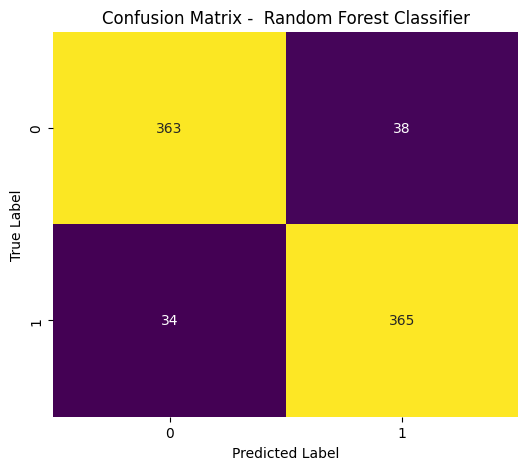

Accuracy score of Random Forest Classifier: 0.91


In [33]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=42)
rfc_model = forest.fit(x_train, y_train)
forest_pred = rfc_model.predict(x_test)

plt.figure(figsize=(6,5))
sns.heatmap(metrics.confusion_matrix(y_test, forest_pred), annot=True, fmt='d', cbar=False, cmap=sns.color_palette("viridis", as_cmap=True))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix -  Random Forest Classifier')
plt.show()

print(f"Accuracy score of Random Forest Classifier: {metrics.accuracy_score(y_test, forest_pred)}")


### Support Vector Classifier
svc produced an accuracy of 92.375%, which is indicates that SVC is a very good model for this dataset and the best model we have so far.

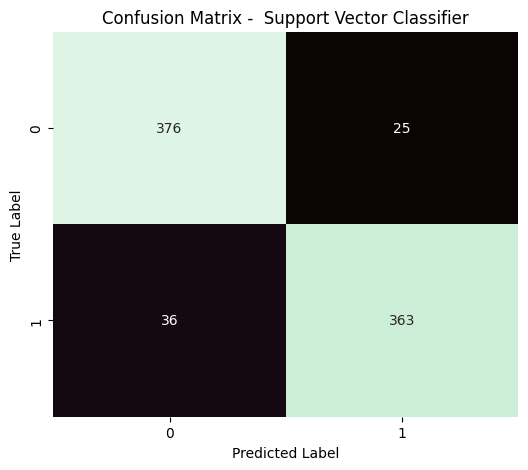

Accuracy score of Support Vector Classifier: 0.92375


In [34]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf',gamma='auto',C=10)
svc_model = svc.fit(x_train, y_train)
svc_pred = svc_model.predict(x_test)

plt.figure(figsize=(6,5))
sns.heatmap(metrics.confusion_matrix(y_test, svc_pred), annot=True, fmt='d', cbar=False, cmap=sns.color_palette("mako", as_cmap=True))
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix -  Support Vector Classifier')
plt.show()

print(f"Accuracy score of Support Vector Classifier: {metrics.accuracy_score(y_test, svc_pred)}")

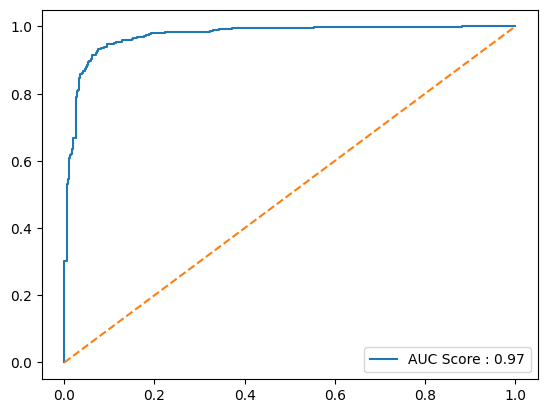

In [35]:
from sklearn.metrics import roc_curve, auc
y_prob = svc_model.decision_function(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC Score : {roc_auc:.2f}")
plt.plot([0,1],[0,1], linestyle= '--')
plt.legend()